In [35]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import numpy as np
import pandas as pd
import sklearn.linear_model
from scipy import signal, ndimage

In [36]:
datasheet = pd.read_csv("2022-05-05_14-55-25.csv", delimiter=";", index_col=0)

In [37]:
displaced = datasheet.copy()
for i in range (0,4):
    displaced[f"ch{i}"] = displaced[f"ch{i}"] - displaced[f"ch{i}"].mean()
displaced

,ch0,ch1,ch2,ch3
gesture,,,,
hand_open,-39.098871,-11.24358,200.246927,28.380237
hand_open,12.901129,-67.24358,116.246927,-260.619763
hand_open,4.901129,-43.24358,157.246927,-218.619763
hand_open,-7.098871,52.75642,48.246927,-716.619763
hand_open,-8.098871,-123.24358,159.246927,199.380237
...,...,...,...,...
hand_flex_curl,-167.098871,-74.24358,-99.753073,135.380237
hand_flex_curl,-91.098871,90.75642,170.246927,-738.619763
hand_flex_curl,84.901129,312.75642,444.246927,-25.619763


In [38]:
displaced.to_csv("displaced.csv")

In [39]:
for i in range(0,4):
    plt.plot(range(0,1090), displaced[f"ch{i}"][:1090])
    plt.plot(range(1090, 2090), displaced[f"ch{i}"][1090:2090])
    plt.suptitle("Original line Plot")
    plt.title(f"Channel {i}")
    plt.savefig(f"graphs/displaced/displaced-line-ch{i}.png")
    plt.clf()

<Figure size 640x480 with 0 Axes>

In [40]:
median = displaced.copy()

for i in range(0,4):
    median[f"ch{i}"] = signal.medfilt(median[f"ch{i}"], 9) 
    
median.to_csv("median.csv")

In [41]:
for i in range(0,4):
    plt.plot(range(0,1090), median[f"ch{i}"][:1090])
    plt.plot(range(1090, 2090), median[f"ch{i}"][1090:2090])
    plt.suptitle("Filtered Line Plot")
    plt.title(f"Channel {i}")
    plt.savefig(f"graphs/median/median-line-ch{i}.png")
    plt.clf()

<Figure size 640x480 with 0 Axes>

In [42]:
mov_avg = median.copy()

mov_avg['ch0'] = median.ch0.rolling(100).mean()
mov_avg['ch1'] = median.ch1.rolling(100).mean()
mov_avg['ch2'] = median.ch2.rolling(100).mean()
mov_avg['ch3'] = median.ch3.rolling(100).mean()
    
mov_avg.to_csv('mov_avg.csv')

In [43]:
for i in range(0,4):
    plt.plot(range(0,1090), mov_avg[f"ch{i}"][:1090])
    plt.plot(range(1090, 2090), mov_avg[f"ch{i}"][1090:2090])
    plt.suptitle("Moving Average Line Plot")
    plt.title(f"Channel {i}")
    plt.savefig(f"graphs/mov_avg/mov_avg-line-ch{i}.png")
    plt.clf()
    
for i in range(0,4):
    plt.scatter(range(0,1090), mov_avg[f"ch{i}"][:1090], s=2)
    plt.scatter(range(1090, 2090), mov_avg[f"ch{i}"][1090:2090], s=2)
    plt.suptitle("Moving Average Scatter Plot")
    plt.title(f"Channel {i}")
    plt.savefig(f"graphs/mov_avg/mov_avg-scatter-ch{i}.png")
    plt.clf()

<Figure size 640x480 with 0 Axes>

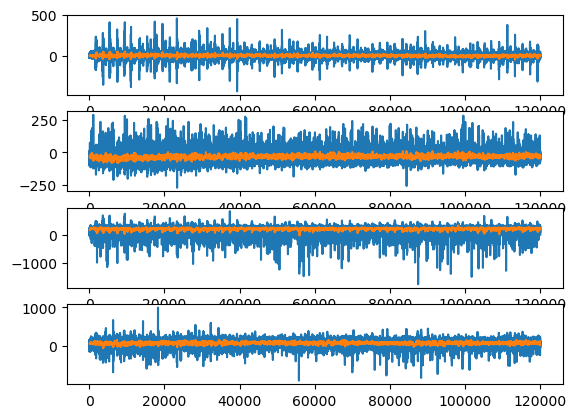

In [44]:
fig, axes = plt.subplots(4,1)

for i in range(0,4):
    axes[i].plot(range(len(median[f'ch{i}'])), median[f'ch{i}'])
    axes[i].plot(range(len(mov_avg[f'ch{i}'])), mov_avg[f'ch{i}'])

In [45]:
for i in range(0,4):
    plt.plot(range(0,2090), displaced[f'ch{i}'][:2090])
    plt.plot(range(0,2090), mov_avg[f'ch{i}'][:2090])
    plt.suptitle(f'Comparison Rolling mean and median graphs ch{i + 1}')
    plt.title("comparison between the first 2090 values of both graphs")
    plt.savefig(f"graphs/comparisons/comparison-line-ch{i + 1}.png")
    plt.clf()

<Figure size 640x480 with 0 Axes>

In [46]:
for i in range(0,4):
    plt.plot(range(0,len(displaced['ch0'])), displaced[f'ch{i}'])
    plt.plot(range(0,len(mov_avg['ch0'])), mov_avg[f'ch{i}'])
    plt.plot(range(0,len(displaced['ch0'])), np.zeros_like(displaced['ch0']))
    plt.suptitle(f'seeing the zero of ch{i + 1}')
    plt.savefig(f"graphs/zero/zer-line-ch{i + 1}.png")
    plt.clf()

<Figure size 640x480 with 0 Axes>

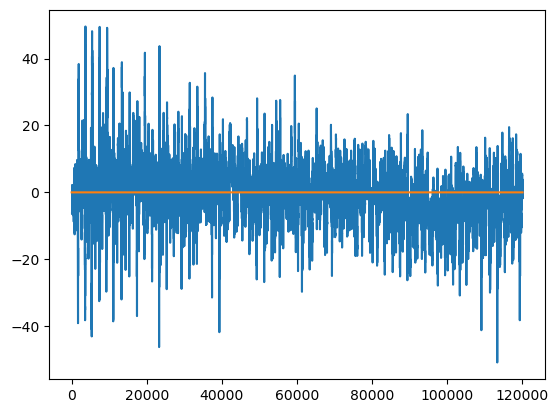

In [34]:
plt.plot(range(0,len(mov_avg['ch0'])), mov_avg['ch0'])
plt.plot(range(0,len(mov_avg['ch0'])), np.zeros_like(mov_avg['ch0']))